# Data Prep

In [2]:
import os
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"

In [3]:
os.chdir('..')

In [4]:
population_data=[f"{RAW_PATH}/2016/conjunto_de_datos_poblacion_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_poblacion_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_poblacion_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"]


income_personal_data=[f"{RAW_PATH}/2016/conjunto_de_datos_ingresos_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_ingresos_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_ingresos_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_ingresos_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh2022_ns.csv"]

bills_personal_data=[f"{RAW_PATH}/2016/conjunto_de_datos_gastospersona_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_gastospersona_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_gastospersona_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_gastospersona_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh2022_ns.csv"]

bills_house_data=[f"{RAW_PATH}/2016/conjunto_de_datos_gastoshogar_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_gastoshogar_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_gastoshogar_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_gastoshogar_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_gastoshogar_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_gastoshogar_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_gastoshogar_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_gastoshogar_enigh2022_ns.csv"]



### Bills

In [70]:
# ----- Bills ---------
year=2016
dataframe_list=[]
for file_path in bills_personal_data:
    columns_interest=['folioviv', 'foliohog', 'numren', # Primary key 
                   'clave', 'mes_dia', 'forma_pag1', 'forma_pag2', 'forma_pag3', 'inscrip',
                   'colegia', 'material', 'cantidad', 'gasto', 'costo', 'gasto_tri']

    df=pd.read_csv(file_path)
    df=df[columns_interest]
    
    fill_columns=['cantidad','gasto','costo','gasto_tri']

    for column in fill_columns:
        if df[column].dtype=='object':
            df[column]=df[column].str.replace(' ','0')
    

    formats={
        'clave':'string',
        'cantidad':'float',
        'gasto':'float',
        'costo':'float',
        'gasto_tri':'float',
        'year':'int'
    }

    df['entidad']=df['folioviv']//10**8
    df['year']=year
    
    df=df.astype(formats)
    df=df.rename(columns={'clave':'clave_gasto'})
    dataframe_list.append(df)
    year+=2
    

bills_personal=pd.concat(dataframe_list)

medical_bills=[f"J00{i}" for i in range(1,10)]+[f"J0{i}" for i in range(10,73)]
alcohol_and_cigarettes=[f"A{i}" for i in range(223,241)]



/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/3931225829.py:9: DtypeWarning: Columns (6,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/3931225829.py:9: DtypeWarning: Columns (6,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


In [7]:
# ----- Bills ---------
year=2016
dataframe_list=[]
for file_path in bills_house_data:
    columns_interest=['folioviv', 'foliohog', # Primary key 
                   'clave', 'gasto', 'costo', 'gasto_tri']

    df=pd.read_csv(file_path)
    df=df[columns_interest]
    
    fill_columns=['gasto','costo','gasto_tri']

    for column in fill_columns:
        if df[column].dtype=='object':
            df[column]=df[column].str.replace(' ','0')
    

    formats={
        'clave':'string',
        'gasto':'float',
        'costo':'float',
        'gasto_tri':'float',
        'year':'int'
    }

    df['entidad']=df['folioviv']//10**8
    df['year']=year
    
    df=df.astype(formats)
    df=df.rename(columns={'clave':'clave_gasto_h','gasto_tri':'gasto_tri_h','gasto':'gasto_h'})
    dataframe_list.append(df)
    year+=2
    

bills_house=pd.concat(dataframe_list)



/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_80495/1391439009.py:8: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_80495/1391439009.py:8: DtypeWarning: Columns (13,14,16,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


### Income

In [5]:
# ----- Income ---------
year=2016
dataframe_list=[]
for file_path in income_personal_data:
    columns_interest=['folioviv', 'foliohog', 'numren' # Primary key 
                     ,'clave','ing_tri']

    df=pd.read_csv(file_path)
    df=df[columns_interest]
    
    

    formats={
        'clave':'string',
        'ing_tri':'float',
        'year':'int'
    }

    df['entidad']=df['folioviv']//10**8
    df['year']=year
    
    df=df.astype(formats)
    df=df.rename(columns={'clave':'clave_ingreso'})
    dataframe_list.append(df)
    year+=2
    

income=pd.concat(dataframe_list)





### Population

In [58]:
# ----- Population --------  
dataframe_list=[]
year=2016
for file_path in population_data:
    
    columns_interest=[
        'folioviv', 'foliohog', 'numren', # Primary key
        'parentesco', 'sexo', 'edad',
        'alfabetism','asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b',
        'forma_b', 'tiene_c', 'forma_c', 'nivelaprob', 'gradoaprob',
        'antec_esc', 'residencia', 'diabetes', 'pres_alta', 'peso','num_trabaj'
    ]

    df=pd.read_csv(file_path)
    df=df[columns_interest]

    fill_column=['nivel','grado','alfabetism','tipoesc','asis_esc','antec_esc','num_trabaj','nivelaprob','gradoaprob']
    for column in fill_column:
        if df[column].dtype=='object':
            df[column]=df[column].str.replace(' ','0')     
        else:
            df[column]=df[column].fillna(0)

    formats={
        'alfabetism':'int64',
        'asis_esc':'int64',
        'nivel':'int64',
        'grado':'int64',
        'tipoesc':'int64',
        'nivelaprob':'int64',
        'gradoaprob':'int64'
    }
    df['entidad']=df['folioviv']//10**8
    df['year']=year

    bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Generation birth ranges
    labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Generation labels

    df['año_nacimiento']=df['year']-df['edad']
    df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)
    df.drop(columns='año_nacimiento', inplace=True)

    df=df.astype(formats)
    dataframe_list.append(df)
    year+=2

population=pd.concat(dataframe_list)

entity_catalogue=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/catalogos/entidad.csv"
entity=pd.read_csv(entity_catalogue,encoding='Windows-1252')

population=pd.merge(population,entity, on='entidad',how='inner')
population=population.rename(columns={'descripcion':'nombre_entidad'})

level_catalogue=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/catalogos/nivelaprob.csv"
level=pd.read_csv(level_catalogue,encoding="Windows-1252")

population=pd.merge(population,level, on='nivelaprob',how='inner')
population=population.rename(columns={'descripcion':'nivel_nombre'})

nivel_nombre_order = [
    'Ninguno',
    'Preescolar',
    'Primaria',
    'Secundaria', 
    'Preparatoria o bachillerato',
    'Profesional',
    'Normal',
    'Carrera técnica o comercial',
    'Maestría',
    'Doctorado'
]

# Convert 'nivel_nombre' column to a categorical type with the defined order
population['nivel_nombre'] = pd.Categorical(population['nivel_nombre'], categories=nivel_nombre_order, ordered=True)


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/2504636057.py:14: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/2504636057.py:14: DtypeWarning: Columns (10,80,81,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/2504636057.py:14: DtypeWarning: Columns (10,11,12,13,14,15,16,17,82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/2504636057.py:14: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


# Barplots

### Average Trimester Income

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/3589817359.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby(['year','generacion'],as_index=False)['ing_tri'].mean()


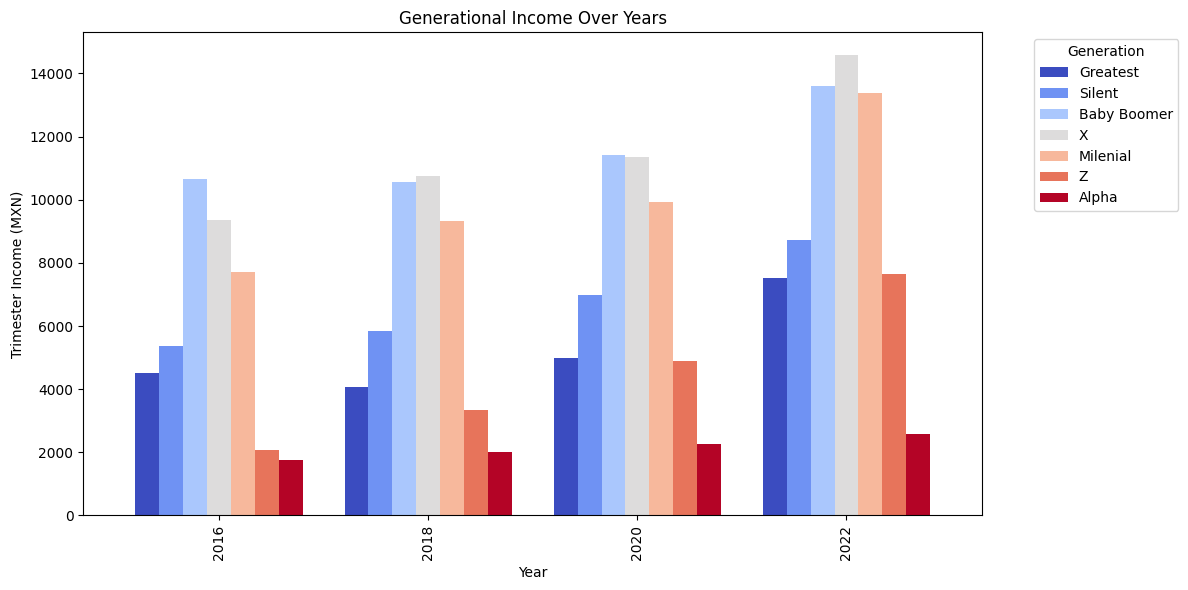

In [10]:
df=pd.merge(income,population, on=['folioviv','foliohog','numren','year','entidad'], how='inner')

#is_year=df['year']==year
#df=df[is_year]

df=df[['folioviv','foliohog','sexo','numren','edad','generacion',
                'entidad','ing_tri','alfabetism','year']]
                
df['ing_tri_total']=df.groupby(['folioviv','foliohog','numren','year'])['ing_tri'].transform('sum')

data=df.groupby(['year','generacion'],as_index=False)['ing_tri'].mean()
pivot_df = data.pivot(index='year', columns='generacion', values='ing_tri')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Generational Income Over Years")
plt.ylabel("Trimester Income (MXN)")
plt.xlabel("Year")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Grade distribution over generations (Year)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/3786117419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=population.groupby(['year','nivel_nombre'],as_index=False)['generacion'].value_counts(normalize=True)


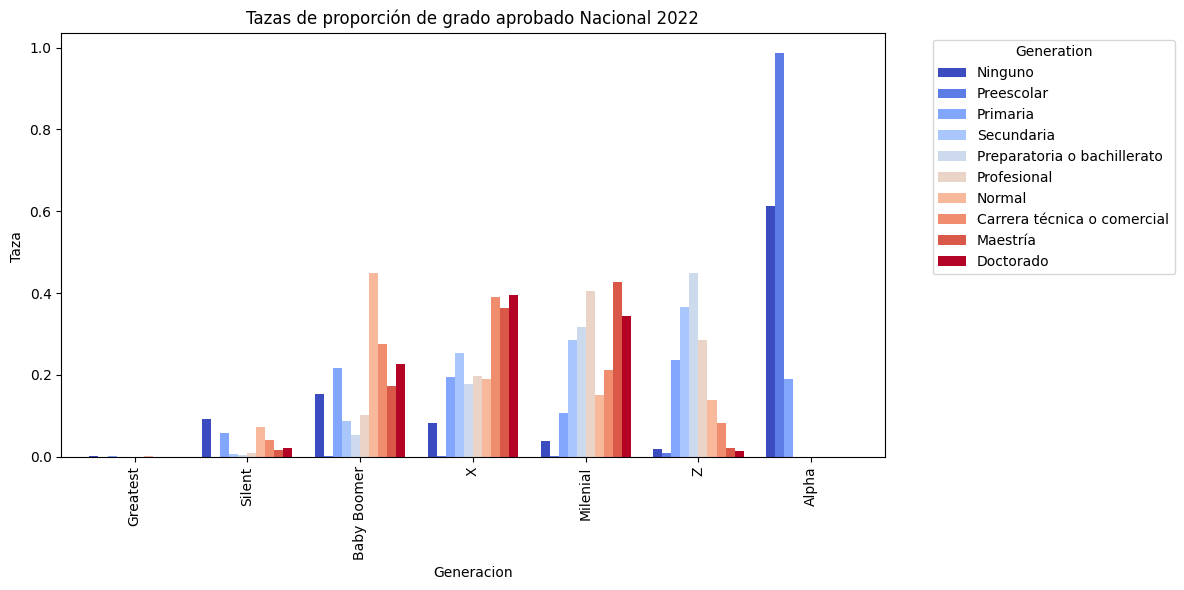

In [59]:
year=2022
data=population.groupby(['year','nivel_nombre'],as_index=False)['generacion'].value_counts(normalize=True)
data=data[data['year']==year]

pivot_df = data.pivot(index='generacion', columns='nivel_nombre', values='proportion')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title(f"Tazas de proporción de grado aprobado Nacional {year}")
plt.ylabel("Taza ")
plt.xlabel("Generacion")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_93027/3850997435.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby(['year','nivel_nombre'],as_index=False)['ing_tri_total'].mean()


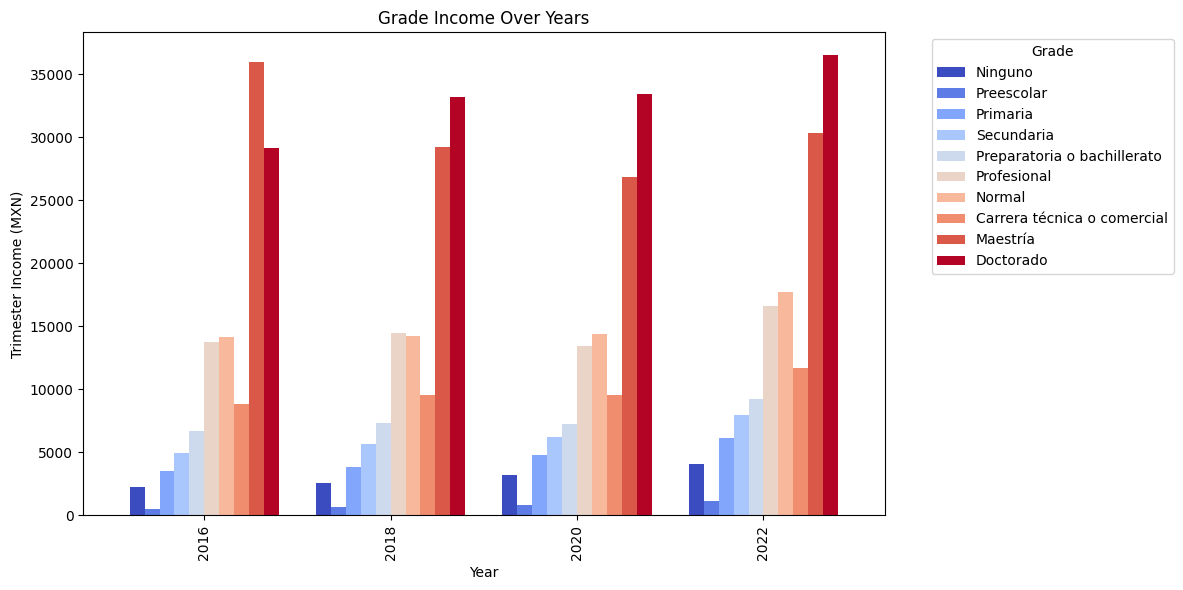

In [81]:
df=pd.merge(income,population, on=['folioviv','foliohog','numren','year','entidad'], how='inner')

#is_year=df['year']==year
#df=df[is_year]

df=df[['folioviv','foliohog','sexo','numren','edad','generacion',
                'entidad','ing_tri','nivel_nombre','year']]
                
df['ing_tri_total']=df.groupby(['folioviv','foliohog','numren','year'])['ing_tri'].transform('sum')

data=df.groupby(['year','nivel_nombre'],as_index=False)['ing_tri_total'].mean()
data['ing_mens']=data['ing_tri_total']/3
pivot_df = data.pivot(index='year', columns='nivel_nombre', values='ing_mens')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Grade Income Over Years")
plt.ylabel("Trimester Income (MXN)")
plt.xlabel("Year")
plt.legend(title="Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Average Trimester Bills

In [72]:
df=pd.merge(bills_personal,population, on=['folioviv','foliohog','year','entidad'], how='inner')

is_year=df['year']==year
df=df[is_year]

df=df[['folioviv','foliohog','sexo','numren','edad','generacion',
                'entidad','gasto_tri','alfabetism','year']]
                
df['gasto_tri_total']=df.groupby(['folioviv','foliohog','year'])['gasto_tri'].transform('sum')

data=df.groupby(['year','generacion'],as_index=False)['gasto_tri'].mean()
pivot_df = data.pivot(index='year', columns='generacion', values='gasto_tri')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Generational Bills Over Years")
plt.ylabel("Bills (gasto_tri_h)")
plt.xlabel("Year")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyError: "['numren'] not in index"

In [8]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Convert pandas DataFrames to Dask DataFrames
bills_house_dd = dd.from_pandas(bills_house, npartitions=4)
population_dd = dd.from_pandas(population, npartitions=4)

# Merge
df_dd = dd.merge(bills_house_dd, population_dd, on=['folioviv', 'foliohog', 'year', 'entidad'], how='inner')

# Select relevant columns
df_dd = df_dd[['folioviv', 'foliohog', 'sexo', 'numren', 'edad', 'generacion',
               'entidad', 'gasto_tri_h', 'alfabetism', 'year']]


# Group by 'year' and 'generacion', then calculate the mean
data_dd = df_dd.groupby(['year', 'generacion'])['gasto_tri_h'].mean().reset_index()



# Compute the result (brings the result back to pandas)
data = data_dd.compute()

# Pivot the data for plotting
pivot_df = data.pivot(index='year', columns='generacion', values='gasto_tri_h')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Generational Bills Over Years")
plt.ylabel("Bills (gasto_tri_h)")
plt.xlabel("Year")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/Users/federicocirett/Documents/GitHub/ingCaracteristicasProyecto_/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Users/federicocirett/Documents/GitHub/ingCaracteristicasProyecto_/venv/lib/python3.12/site-packages/dask/dataframe/groupby.py:1445: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self._meta = self.obj._meta.groupby(


In [ ]:
data_dd

### Grade approved distribution

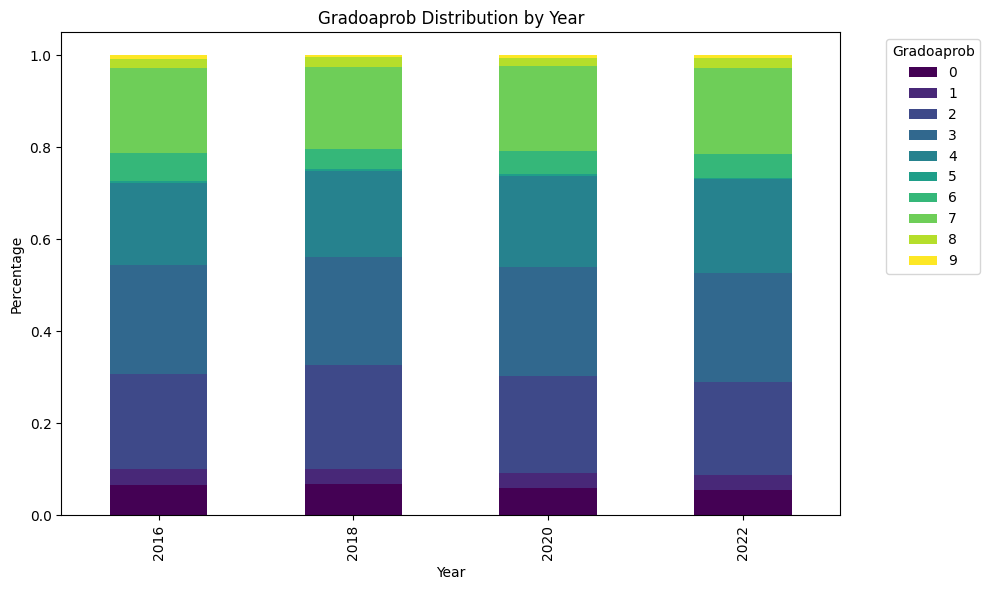

In [18]:
entidad=9
df=population[['folioviv','foliohog','numren','nivelaprob','year','entidad','sexo','nombre_entidad']]

is_entidad=df['entidad']==entidad

df=df[ is_entidad ] 
#df=df.groupby(['nombre_entidad','year'],as_index=False)['gradoaprob'].value_counts(normalize=True)

df_counts = (
    df.groupby(['nombre_entidad', 'year'])['nivelaprob']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index() )

df_pivot = df_counts.pivot(index='year', columns='nivelaprob', values='percentage').fillna(0)

# Plotting the bar graph
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the plot
plt.title('Gradoaprob Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gradoaprob', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()




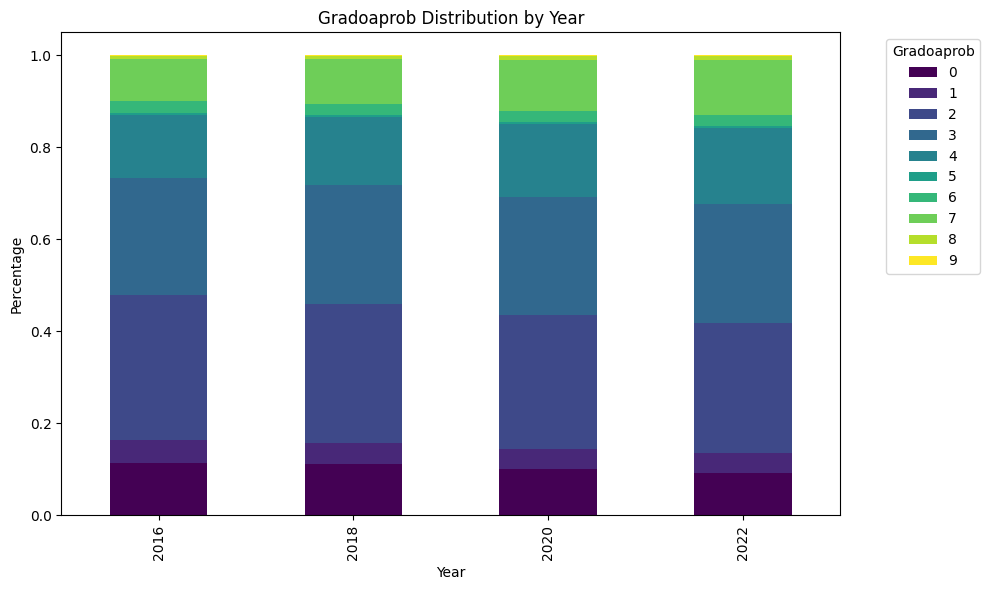

In [19]:

df=population[['folioviv','foliohog','numren','nivelaprob','year','entidad','sexo','nombre_entidad']]

#is_entidad=df['entidad']==entidad

#df=df[ is_entidad ] 
#df=df.groupby(['nombre_entidad','year'],as_index=False)['gradoaprob'].value_counts(normalize=True)

df_counts = (
    df.groupby([ 'year'])['nivelaprob']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index() )

df_pivot = df_counts.pivot(index='year', columns='nivelaprob', values='percentage').fillna(0)

# Plotting the bar graph
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customizing the plot
plt.title('Gradoaprob Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gradoaprob', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()




### Literacy

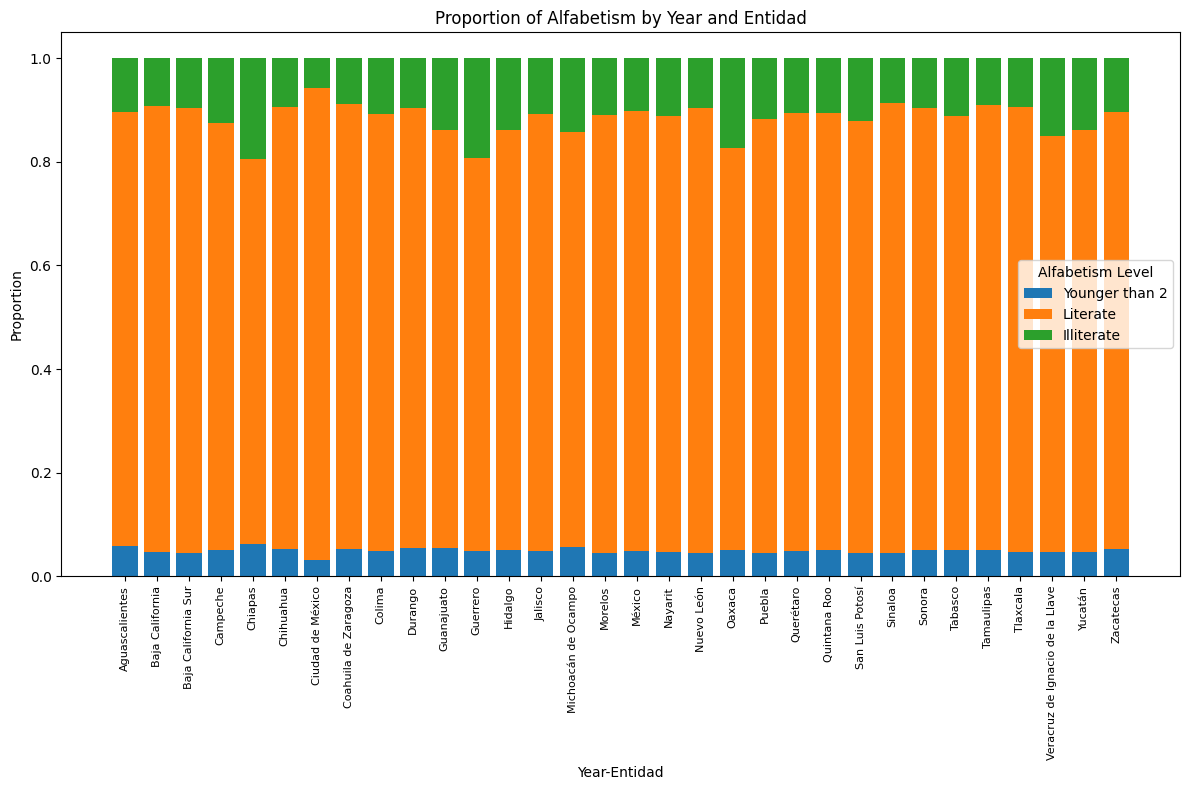

In [199]:
year=2016
df=population[['folioviv','foliohog','numren','alfabetism','year','entidad','sexo','nombre_entidad']]

df=df.groupby(['nombre_entidad','year'],as_index=False)['alfabetism'].value_counts(normalize=True)
is_year=df['year']==year

df=df[is_year]
pivot_df = df.pivot_table(
    index=['nombre_entidad', 'year'], 
    columns='alfabetism', 
    values='proportion', 
    aggfunc='sum'
).reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked bar for each alfabetism level
alfabetism_levels = pivot_df.columns[2:]  # Get all alfabetism levels (0, 1, 2, etc.)
bottom = None

labels={0:'Younger than 2',
        1:'Literate',
        2:'Illiterate'}

for level in alfabetism_levels:
    label=labels[level]
    ax.bar(
        pivot_df['nombre_entidad'].astype(str),
        pivot_df[level],
        label=f'{label}',
        bottom=bottom,
    )
    # Update the bottom for stacking
    bottom = pivot_df[level] if bottom is None else bottom + pivot_df[level]

# Customize the plot
ax.set_title("Proportion of Alfabetism by Year and Entidad")
ax.set_xlabel("Year-Entidad")
ax.set_ylabel("Proportion")
ax.legend(title="Alfabetism Level")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Maps

In [20]:

def heat_map(dataframe,columns,year):
    df=dataframe[columns]



    df_t=df.groupby('entidad')['gradoaprob'].value_counts(normalize=True).reset_index(name='proportion')

    carpeta_descarga='data/raw/DATOS GEOREFERENCIALES/2023'
    mapa_a = f'{carpeta_descarga}/2023_1_00_ENT.shp'
    map_a = gpd.read_file(mapa_a)
    map_a['CVE_ENT']=map_a['CVE_ENT'].astype('int')

    graph_df=pd.merge(df_t,map_a,left_on='entidad',right_on='CVE_ENT',how='inner')

    is_gradoaprob=graph_df['gradoaprob']==3
    data=graph_df[is_gradoaprob]
    data=gpd.GeoDataFrame(data, geometry='geometry')
    fig, ax = plt.subplots(figsize=(12, 8))

    data.plot(
        column='proportion',
        cmap='viridis',       # Colormap for visualizing proportions
        linewidth=0.5,         # Line thickness for borders
        edgecolor='black',      # Border color between regions
        legend=True,            # Add a legend to show the color scale
        ax=ax                   # Plot on the provided axes
    )

    ax.set_axis_off()  # Remove axes for a clean map
    plt.title("Proportion Map by Entidad")  # Optional: Add a title
    plt.show()

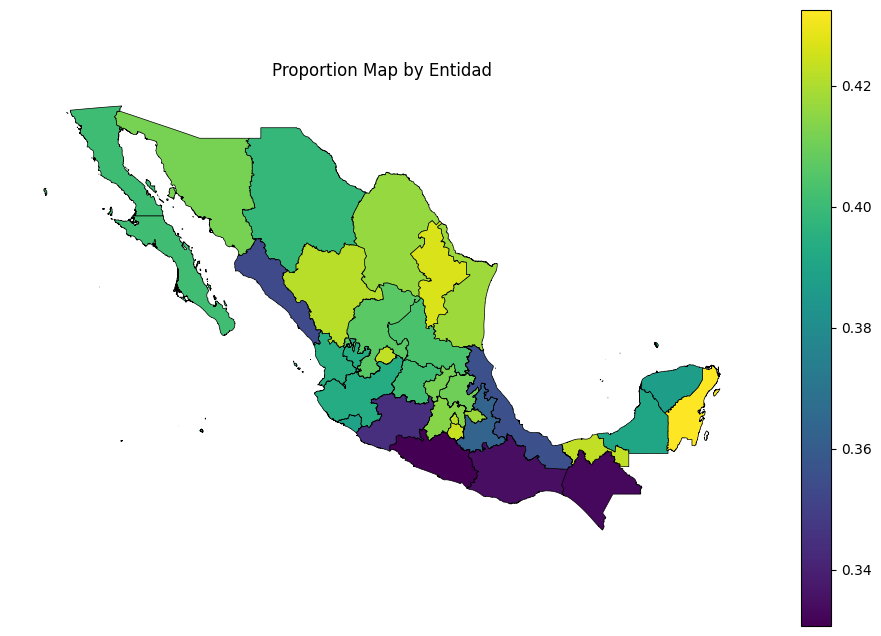

In [21]:
population_columns= ['folioviv', 'foliohog', 'numren', 'entidad','sexo', 'edad','generacion','alfabetism', 'asis_esc', 'nivel','grado', 'tipoesc','nivelaprob', 'gradoaprob']
heat_map(population,population_columns,2022)

# Line Graphs

### Literacy 

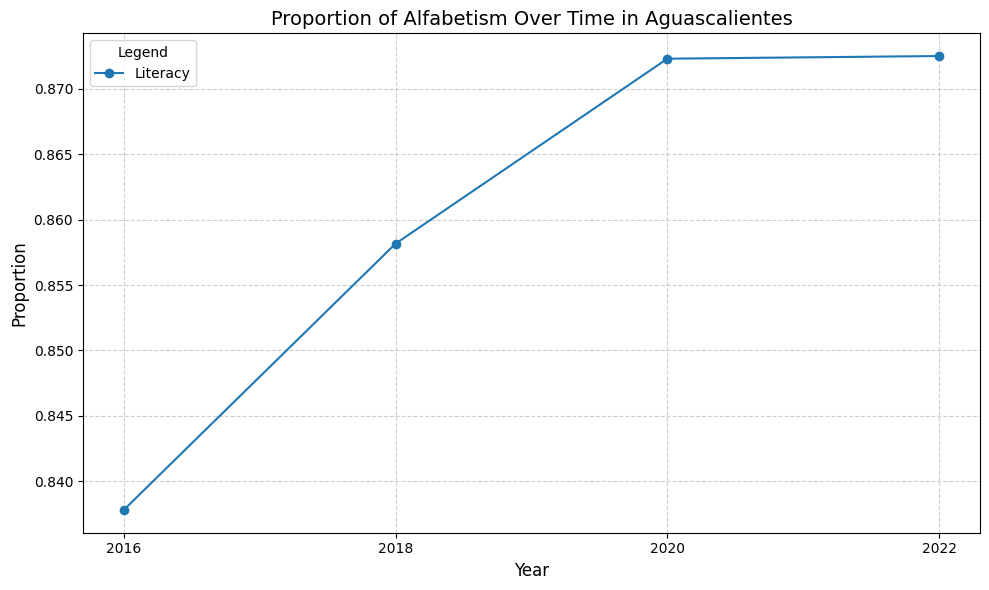

In [233]:
entidad=1
df=population[['folioviv','foliohog','numren','alfabetism','year','entidad','sexo','nombre_entidad']]

is_literate= df['alfabetism']==1
is_entidad=df['entidad']==entidad

df=df[ is_entidad ] 
df=df.groupby(['nombre_entidad','year'],as_index=False)['alfabetism'].value_counts(normalize=True)
df=df[ df['alfabetism']==1 ]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Filter for a specific `alfabetism` level, e.g., level 1
for alfabetism_level in df['alfabetism'].unique():
    subset = df[df['alfabetism'] == alfabetism_level]
    ax.plot(
        subset['year'], 
        subset['proportion'], 
        marker='o', 
        label=f'Literacy'
    )

# Customize the plot
ax.set_title(f"Proportion of Alfabetism Over Time in {df['nombre_entidad'][0]}", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xticks(df['year'])
ax.legend(title="Legend")
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
def line_graph(dataframe,columns,entidad=None):
    df=dataframe[columns]
    is_entidad=df['entidad']==entidad
    if entidad is not None:
        df=df[ is_entidad ] 
        df=df.groupby(['nombre_entidad','year'],as_index=False)['alfabetism'].value_counts(normalize=True)
        df=df[ df['alfabetism']==1 ]
        name=df['nombre_entidad'][0]
    else: 
        df=df.groupby('year',as_index=False)['alfabetism'].value_counts(normalize=True)
        df=df[ df['alfabetism']==1 ]
        name='México'
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filter for a specific `alfabetism` level, e.g., level 1
    for alfabetism_level in df['alfabetism'].unique():
        subset = df[df['alfabetism'] == alfabetism_level]
        ax.plot(
            subset['year'], 
            subset['proportion'], 
            marker='o', 
            label=f'Literacy'
        )
    


    # Customize the plot
    ax.set_title(f"Proportion of Alfabetism Over Time in {name}", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Proportion", fontsize=12)
    ax.set_xticks(df['year'])
    ax.legend(title="Legend")
    ax.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()
    plt.show()

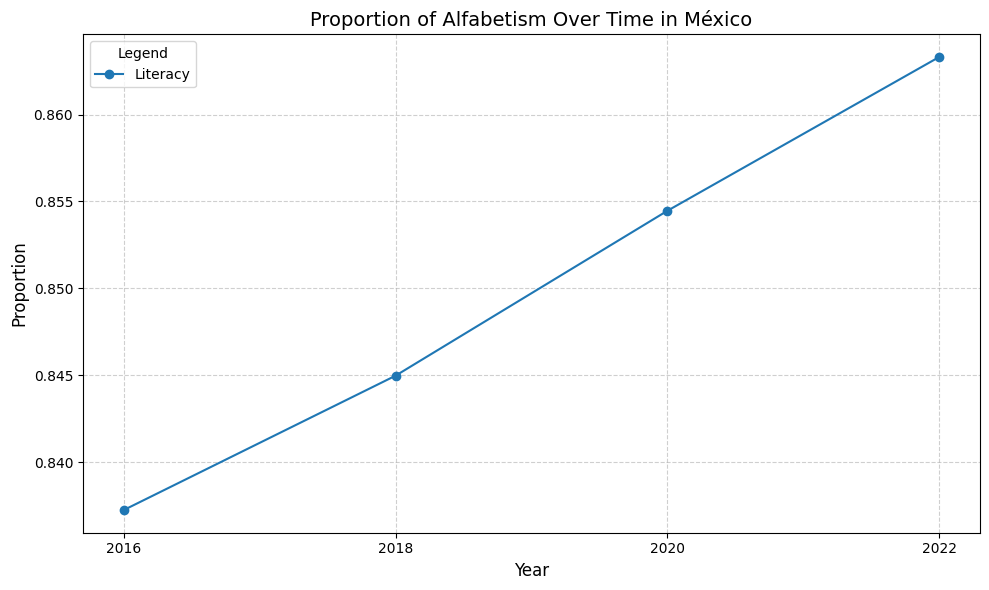

In [68]:
columns=['folioviv','foliohog','numren','alfabetism','year','entidad','sexo','nombre_entidad']
line_graph(population,columns)

### Bills 

In [241]:
entidad=1
df=population[['folioviv','foliohog','numren','gradoaprob','year','entidad','sexo','nombre_entidad']]

is_entidad=df['entidad']==entidad

#df=df[ is_entidad ] 
df=df.groupby(['nombre_entidad','year'],as_index=False)['gradoaprob'].mean()
df['gradoaprob'] = df['gradoaprob'].round()



